# Analyse du Bonheur dans le monde

In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulation
from matplotlib import pyplot as plt # Data visualization
import seaborn as sns         # Data visualization
import scipy.stats as stats
import chart_studio.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
data2019 = pd.read_csv("dataSet/2019.csv") # Lire le dataset
data2019.describe() # Bref résumer

,Rang generale,Score,PIB par habitant,Famille,Esperance de vie,Liberte,Generosite,Corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [3]:
data2019.dtypes

Rang generale         int64
Pays                 object
Score               float64
PIB par habitant    float64
Famille             float64
Esperance de vie    float64
Liberte             float64
Generosite          float64
Corruption          float64
dtype: object

In [4]:
data2019.corr()

,Rang generale,Score,PIB par habitant,Famille,Esperance de vie,Liberte,Generosite,Corruption
Rang generale,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
PIB par habitant,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Famille,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Esperance de vie,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Liberte,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosite,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<AxesSubplot:>

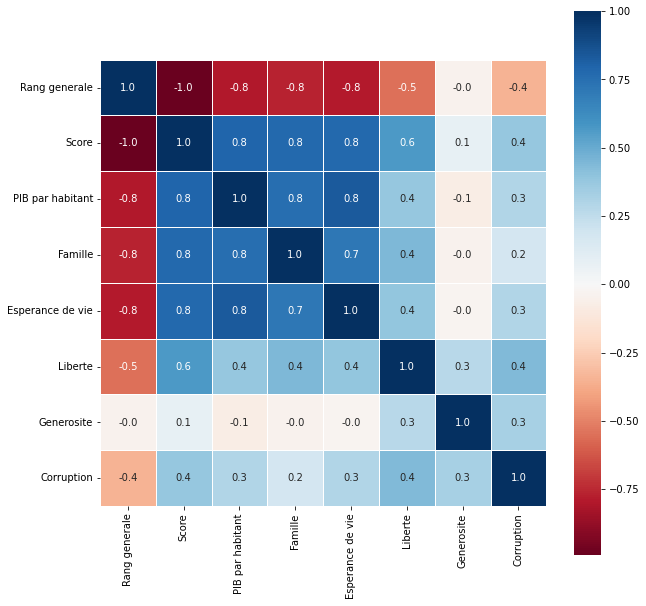

In [5]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data2019.corr(),
            annot=True,
            linewidths=1,
            cmap="RdBu",
            center=0,
            fmt=".1f",
            square=True
           )

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

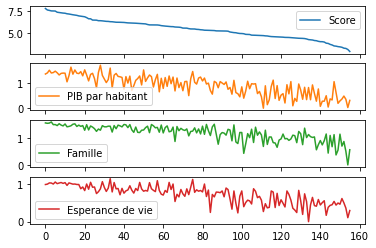

In [7]:
data_plot = data2019[["Score","PIB par habitant", "Famille", "Esperance de vie"]]
data_plot.plot(subplots=True)

In [ ]:
data_plot.plot()

<AxesSubplot:xlabel='PIB par habitant', ylabel='Score'>

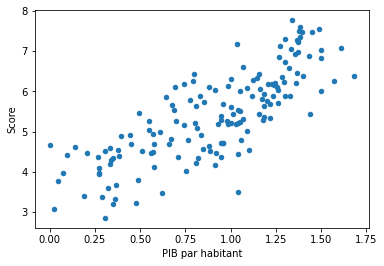

In [8]:
data_plot.plot(kind = "scatter", x = "PIB par habitant", y = "Score")

## Carte du monde du bonheur 

In [11]:
location = pd.read_csv("dataSet/concap.csv") # Lire le dataset

In [12]:
location.dtypes

CountryName          object
CapitalName          object
CapitalLatitude     float64
CapitalLongitude    float64
CountryCode          object
ContinentName        object
dtype: object

In [13]:
data_new = pd.merge(location[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
data2019,left_on='CountryName',right_on='Pays')

In [14]:
happiness_score = data_new['Score'].astype(float)

In [15]:
data = [dict(
        type='choropleth',
        colorscale = 'Rainbow',
        locations = data_new['CountryName'],
        z = happiness_score,
        locationmode = 'country names',
        text = data_new['Pays'],
        colorbar = dict(
        title = 'Score du Bonheur', 
        titlefont=dict(size=25),
        tickfont=dict(size=18))
)]
layout = dict(
    title = 'Score du Bonheur',
    titlefont = dict(size=40),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
        )
)
choromap = go.Figure(data = data, layout = layout)
iplot(choromap, validate=False)

## Classement pays en fonction du bonheur 

Text(0.5, 1.0, 'Score du bonheur')

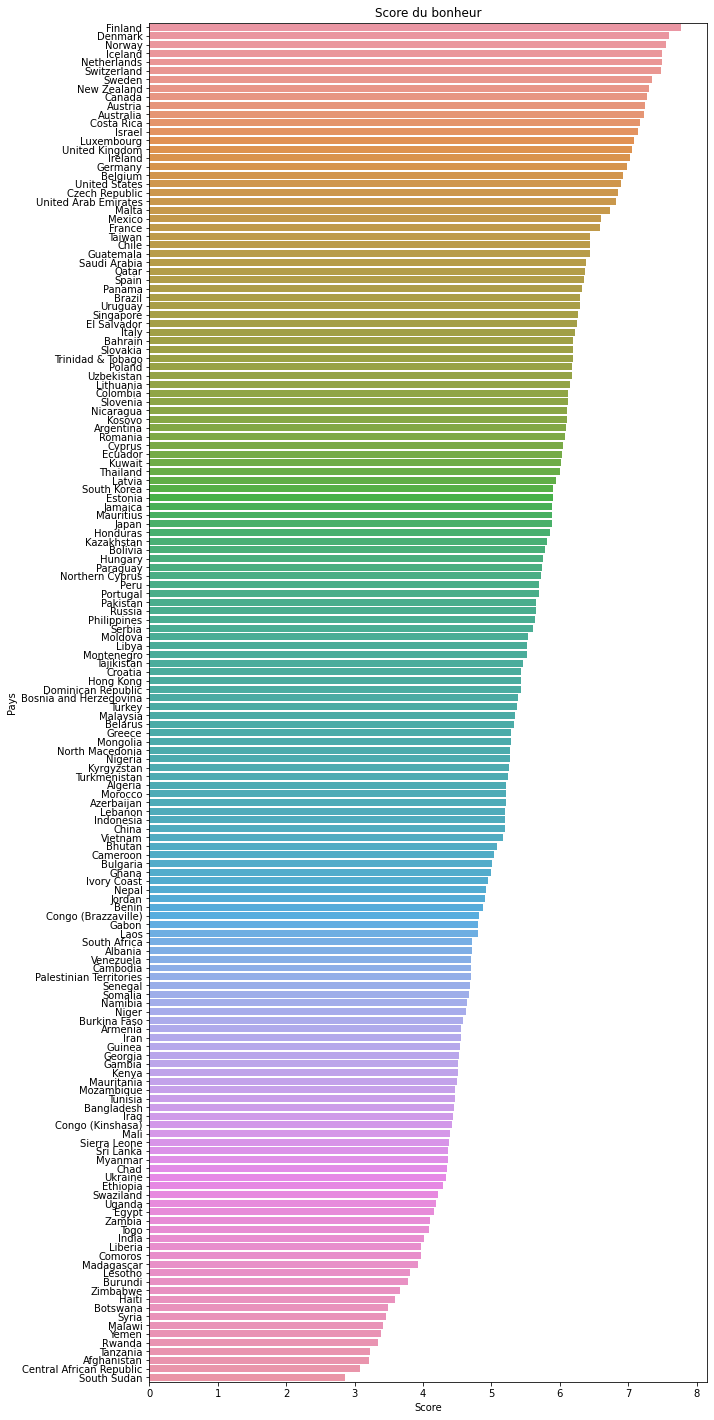

In [55]:
plt.figure(figsize=(10,25))
sns.barplot(x=data2019['Score'], y= data2019['Pays'])
plt.xlabel('Score')
plt.ylabel('Pays')
plt.title('Score du bonheur')

Text(0.5, 1.0, 'Score du bonheur 10 premiers pays')

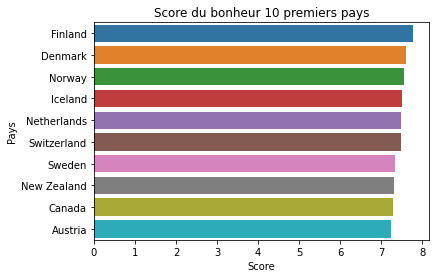

In [17]:
sns.barplot(x=data2019['Score'], y= data2019['Pays'][:10])
plt.xlabel('Score')
plt.ylabel('Pays')
plt.title('Score du bonheur 10 premiers pays')

Text(0.5, 1.0, 'Score du bonheur 10 derniers pays')

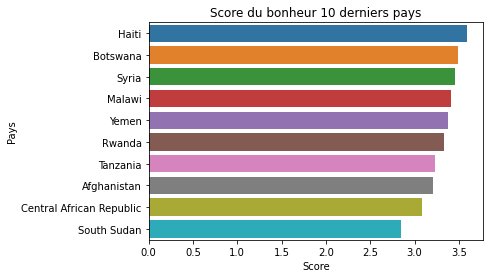

In [18]:
sns.barplot(x=data2019['Score'], y= data2019['Pays'][-10:])
plt.xlabel('Score')
plt.ylabel('Pays')
plt.title('Score du bonheur 10 derniers pays')

## Classement des pays en fonction de l'économie

In [19]:
economie2019 = data2019.sort_values(by=['PIB par habitant'], ascending = False)

Text(0.5, 1.0, 'Classement PIB par habitant par pays')

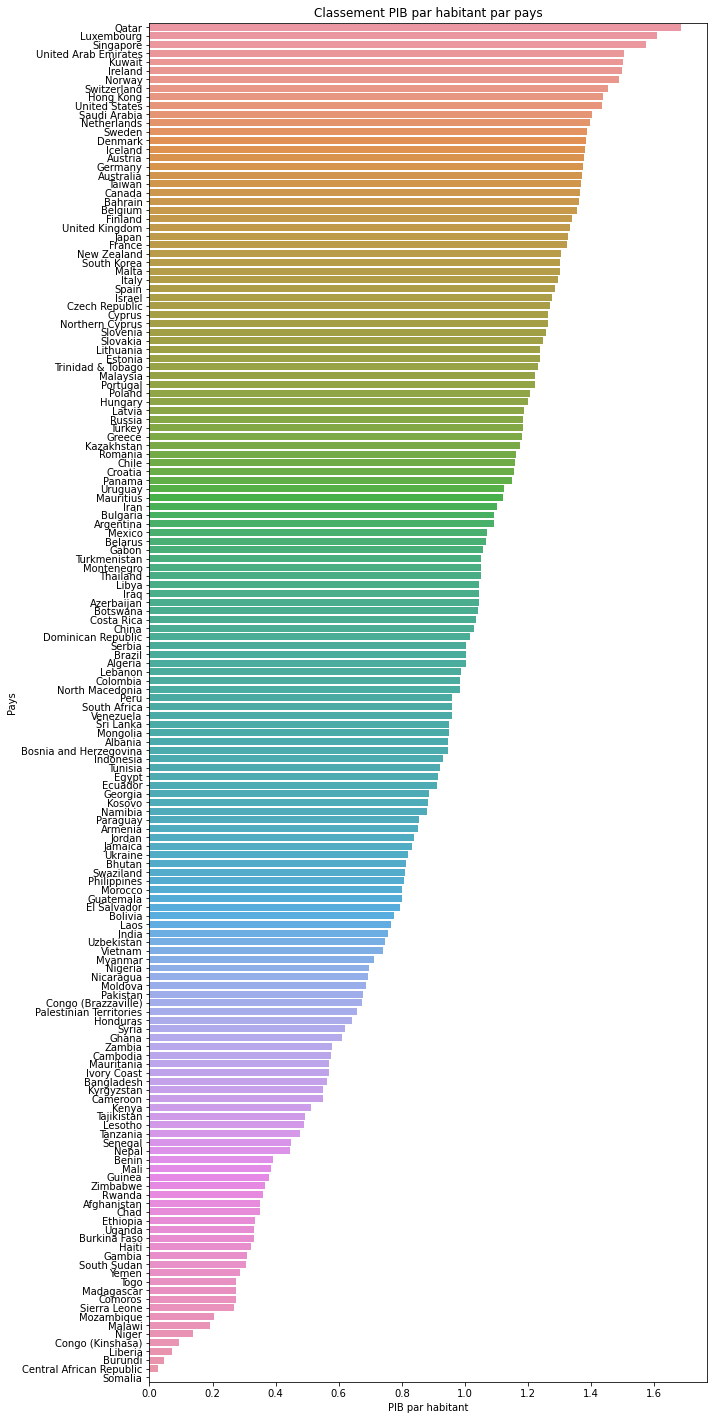

In [20]:
plt.figure(figsize=(10,25))
sns.barplot(x=economie2019['PIB par habitant'], y=economie2019['Pays'])
plt.xlabel('PIB par habitant')
plt.ylabel('Pays')
plt.title('Classement PIB par habitant par pays')

Text(0.5, 1.0, 'Classement PIB par habitant des 10 premiers pays')

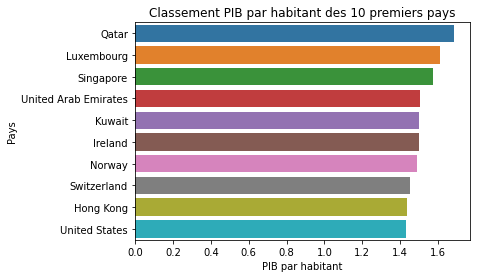

In [21]:
sns.barplot(x=economie2019['PIB par habitant'], y=economie2019['Pays'][:10])
plt.xlabel('PIB par habitant')
plt.ylabel('Pays')
plt.title('Classement PIB par habitant des 10 premiers pays')

Text(0.5, 1.0, 'Classement PIB par habitant des 10 derniers pays')

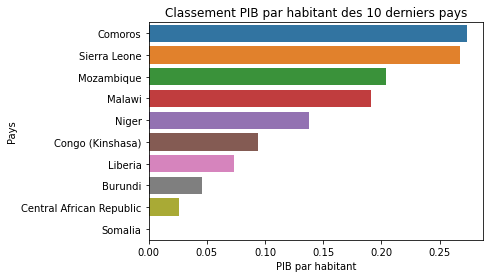

In [23]:
sns.barplot(x=economie2019['PIB par habitant'], y=economie2019['Pays'][-10:])
plt.xlabel('PIB par habitant')
plt.ylabel('Pays')
plt.title('Classement PIB par habitant des 10 derniers pays')

## Classement pays en fonction de l'esperance de vie

In [24]:
life2019 = data2019.sort_values(by=['Esperance de vie'], ascending = False)

Text(0.5, 1.0, 'Classement esperance de vie par pays')

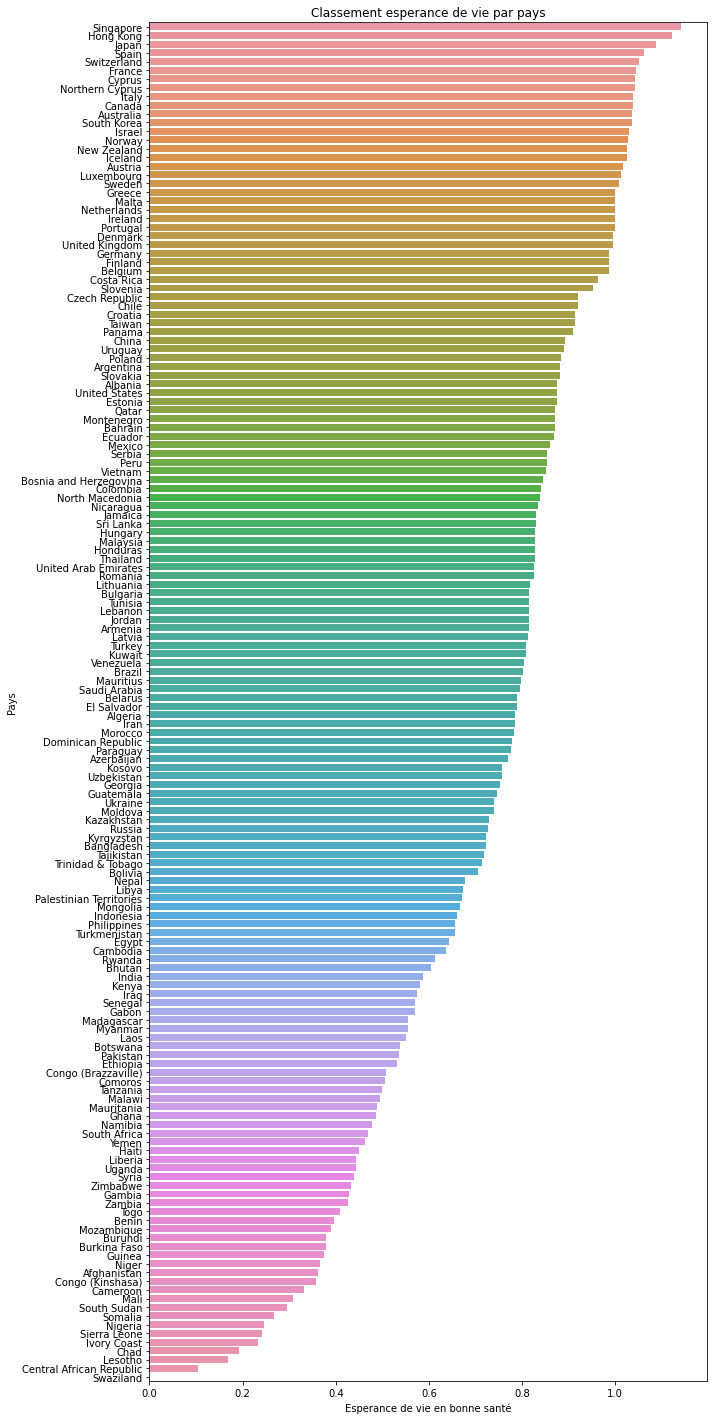

In [25]:
plt.figure(figsize=(10,25))
sns.barplot(x=life2019['Esperance de vie'], y=life2019['Pays'])
plt.xlabel('Esperance de vie en bonne santé')
plt.ylabel('Pays')
plt.title('Classement esperance de vie par pays')

Text(0.5, 1.0, 'Classement esperance de vie des 10 premiers pays')

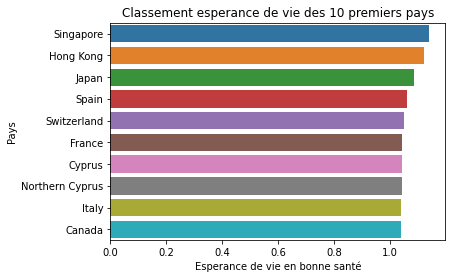

In [27]:
sns.barplot(x=life2019['Esperance de vie'], y=life2019['Pays'][:10])
plt.xlabel('Esperance de vie en bonne santé')
plt.ylabel('Pays')
plt.title('Classement esperance de vie des 10 premiers pays')

Text(0.5, 1.0, 'Classement esperance de vie des 10 derniers pays')

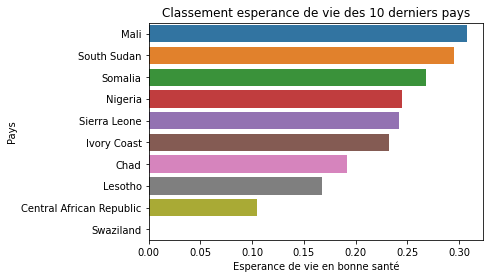

In [28]:
sns.barplot(x=life2019['Esperance de vie'], y=life2019['Pays'][-10:])
plt.xlabel('Esperance de vie en bonne santé')
plt.ylabel('Pays')
plt.title('Classement esperance de vie des 10 derniers pays')

## Classement en fonction de la générosité

In [32]:
gene2019 = data2019.sort_values(by=['Generosite'], ascending = False)

Text(0.5, 1.0, 'Classement Generosité par pays')

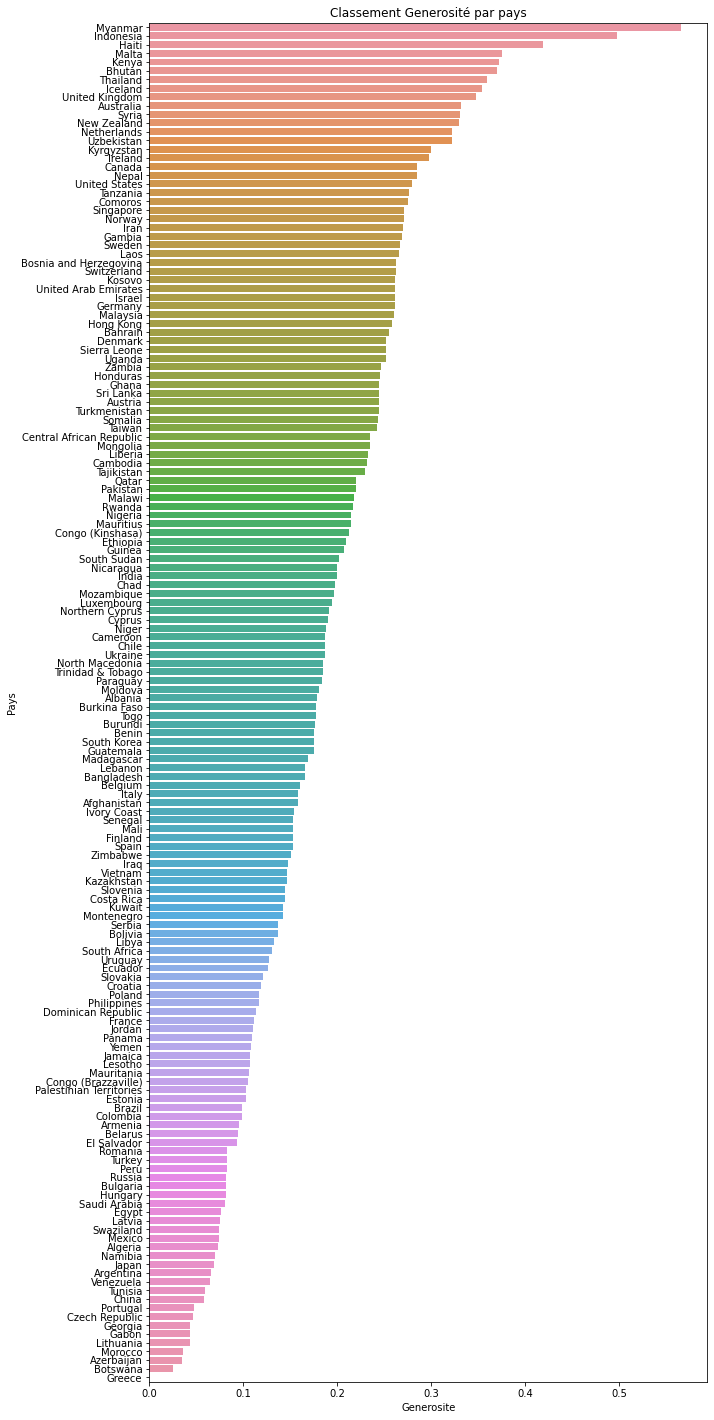

In [33]:
plt.figure(figsize=(10,25))
sns.barplot(x=gene2019['Generosite'], y=gene2019['Pays'])
plt.xlabel('Generosite')
plt.ylabel('Pays')
plt.title('Classement Generosité par pays')

Text(0.5, 1.0, 'Classement Generosité 10 premiers pays')

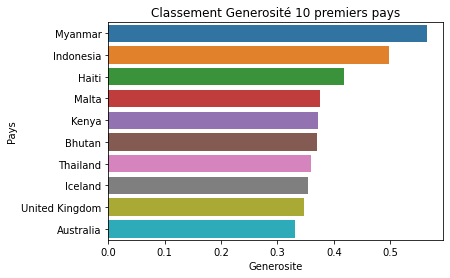

In [35]:
sns.barplot(x=gene2019['Generosite'], y=gene2019['Pays'][:10])
plt.xlabel('Generosite')
plt.ylabel('Pays')
plt.title('Classement Generosité 10 premiers pays')

Text(0.5, 1.0, 'Classement Generosité 10 derniers pays')

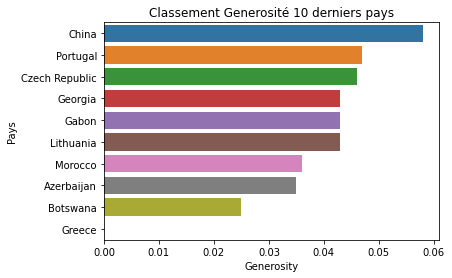

In [36]:
sns.barplot(x=gene2019['Generosite'], y=gene2019['Pays'][-10:])
plt.xlabel('Generosite')
plt.ylabel('Pays')
plt.title('Classement Generosité 10 derniers pays')

## Classement pays en fonction de la perception de la corruption

In [38]:
corr2019 = data2019.sort_values(by=['Corruption'], ascending = False)

Text(0.5, 1.0, 'Classement perception de la corruption par pays')

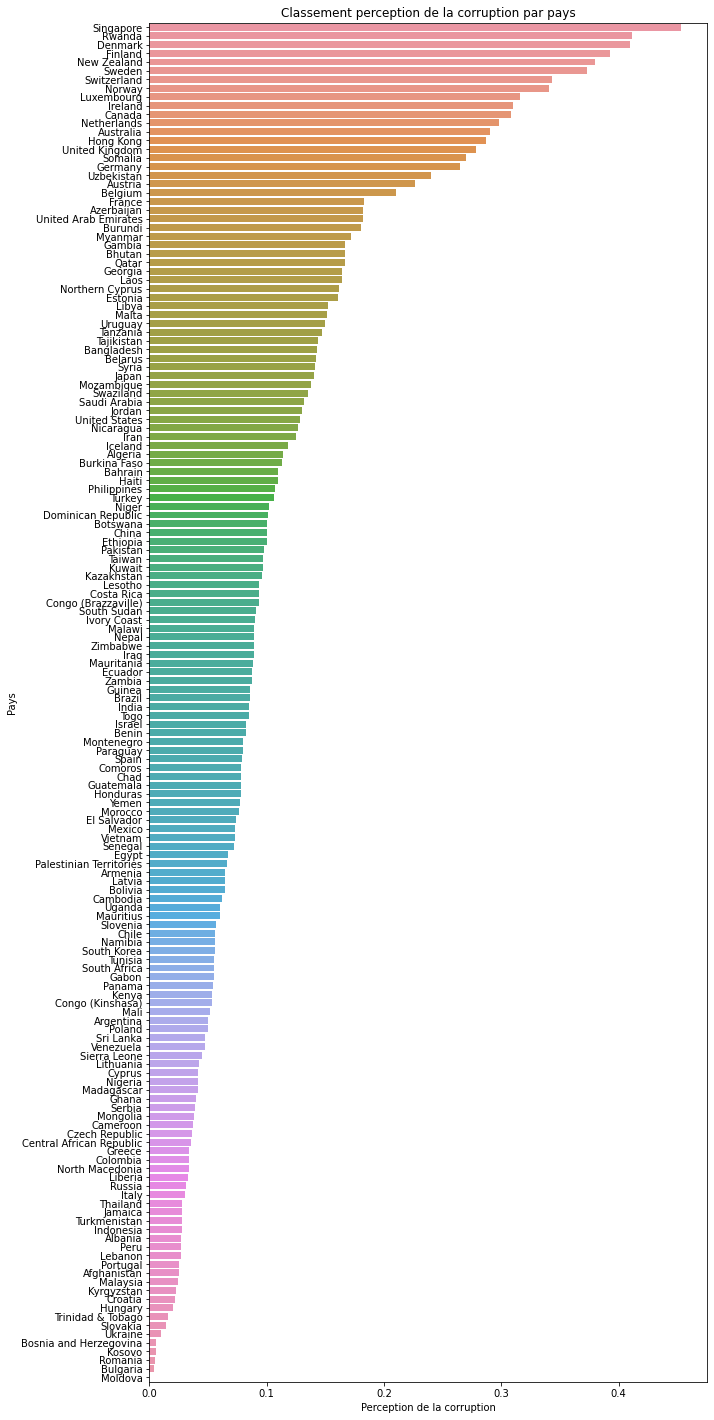

In [40]:
plt.figure(figsize=(10,25))
sns.barplot(x=corr2019['Corruption'], y=corr2019['Pays'])
plt.xlabel('Perception de la corruption')
plt.ylabel('Pays')
plt.title('Classement perception de la corruption par pays')

Text(0.5, 1.0, 'Classement perception 10 premiers par pays')

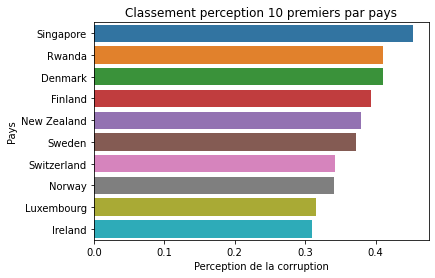

In [41]:
sns.barplot(x=corr2019['Corruption'], y=corr2019['Pays'][:10])
plt.xlabel('Perception de la corruption')
plt.ylabel('Pays')
plt.title('Classement perception 10 premiers par pays')

Text(0.5, 1.0, 'Classement perception de la corruption par pays')

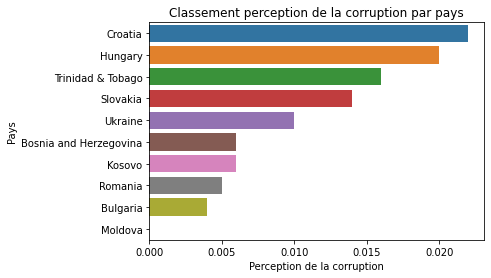

In [42]:
sns.barplot(x=corr2019['Corruption'], y=corr2019['Pays'][-10:])
plt.xlabel('Perception de la corruption')
plt.ylabel('Pays')
plt.title('Classement perception de la corruption par pays')

In [43]:
data2019.dtypes

Rang generale         int64
Pays                 object
Score               float64
PIB par habitant    float64
Famille             float64
Esperance de vie    float64
Liberte             float64
Generosite          float64
Corruption          float64
dtype: object

## Classement en fonction du support social

In [46]:
supp2019 = data2019.sort_values(by=['Famille'], ascending = False)

Text(0.5, 1.0, 'Classement du support social par pays')

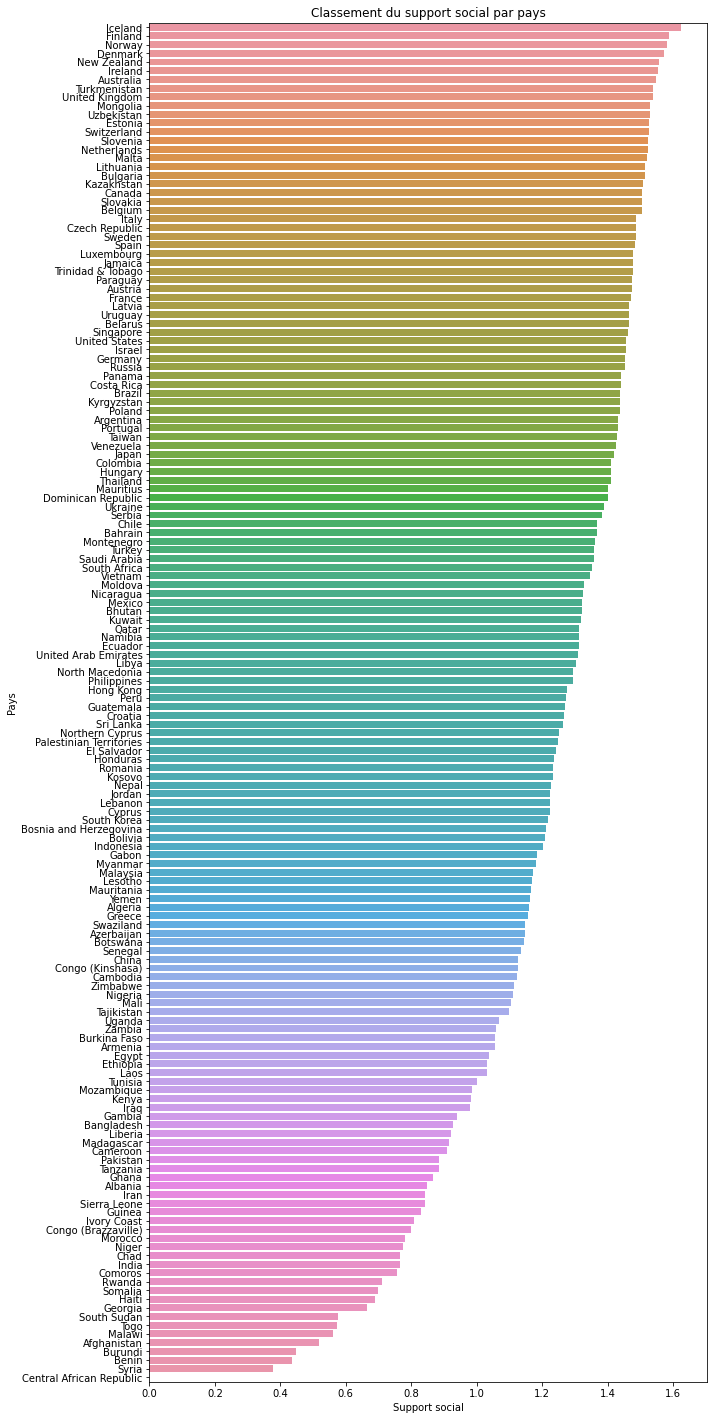

In [47]:
plt.figure(figsize=(10,25))
sns.barplot(x=supp2019['Famille'], y=supp2019['Pays'])
plt.xlabel('Support social')
plt.ylabel('Pays')
plt.title('Classement du support social par pays')

Text(0.5, 1.0, 'Classement du support social des 10 premiers pays')

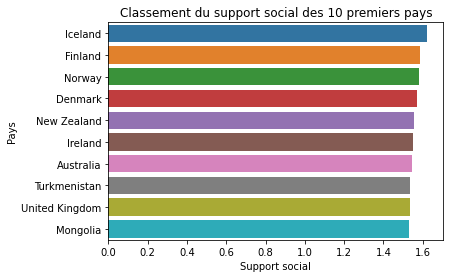

In [48]:
sns.barplot(x=supp2019['Famille'], y=supp2019['Pays'][:10])
plt.xlabel('Support social')
plt.ylabel('Pays')
plt.title('Classement du support social des 10 premiers pays')

Text(0.5, 1.0, 'Classement du support social des 10 derniers pays')

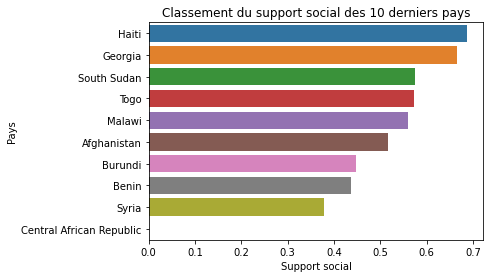

In [49]:
sns.barplot(x=supp2019['Famille'], y=supp2019['Pays'][-10:])
plt.xlabel('Support social')
plt.ylabel('Pays')
plt.title('Classement du support social des 10 derniers pays')

## Classement de la liberté par pays  

In [50]:
free2019 = data2019.sort_values(by=['Liberte'], ascending = False)

Text(0.5, 1.0, 'Classement de la liberté par pays')

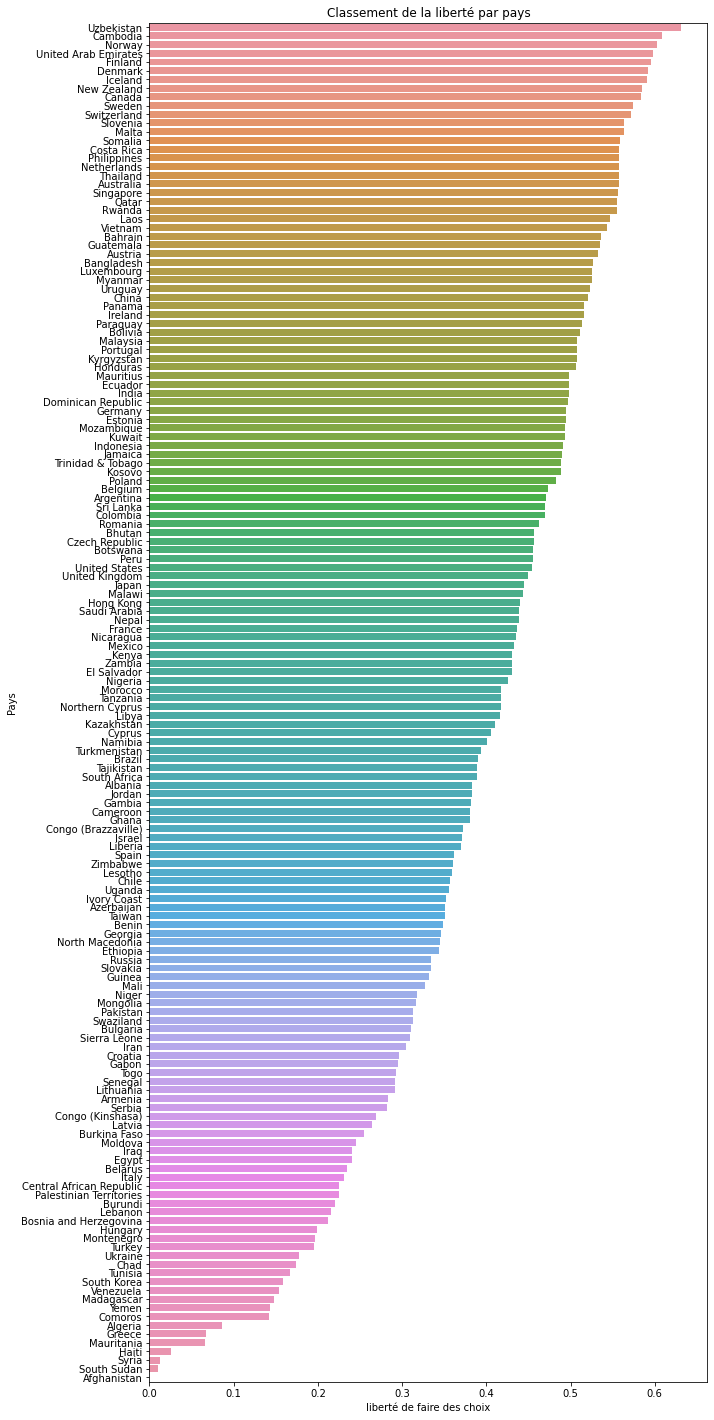

In [51]:
plt.figure(figsize=(10,25))
sns.barplot(x=free2019['Liberte'], y=free2019['Pays'])
plt.xlabel('liberté de faire des choix')
plt.ylabel('Pays')
plt.title('Classement de la liberté par pays')

Text(0.5, 1.0, 'Classement de la liberté des 10 premiers pays')

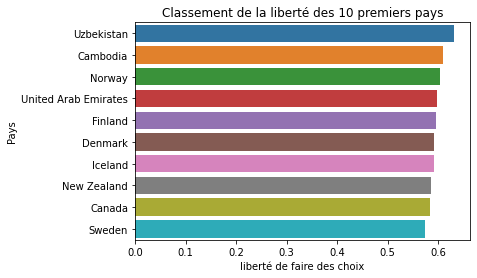

In [52]:
sns.barplot(x=free2019['Liberte'], y=free2019['Pays'][:10])
plt.xlabel('liberté de faire des choix')
plt.ylabel('Pays')
plt.title('Classement de la liberté des 10 premiers pays')

Text(0.5, 1.0, 'Classement de la liberté des 10 derniers pays')

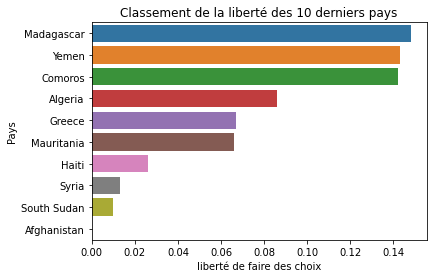

In [53]:
sns.barplot(x=free2019['Liberte'], y=free2019['Pays'][-10:])
plt.xlabel('liberté de faire des choix')
plt.ylabel('Pays')
plt.title('Classement de la liberté des 10 derniers pays')

In [54]:
from plotly.offline import plot
plot(choromap)

'temp-plot.html'

In [ ]:
import tkinter as tk

w = tk.tk()
w.title


#afficher
w.mainloop()